Задание 1.
Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

Построить точечный график
Рассчитать коэффициенты корреляции Пирсона и Спирмена
Построить модель линейной регрессии
Рассчитать коэффициент детерминации
Вывести график остатков

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('water.csv')
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


<AxesSubplot:xlabel='mortality', ylabel='hardness'>

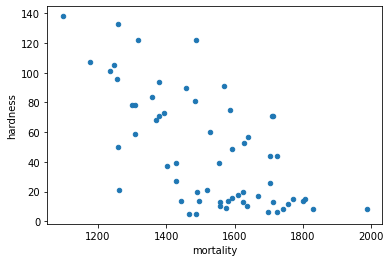

In [4]:
# Точечный график
df.plot(kind='scatter', x='mortality', y='hardness')
# Корреляция обратная

In [5]:
# Коэффициент корреляции Пирсона
df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [6]:
# Коэффициент корреляции Спирмена
df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [7]:
# Корреляция по двум коэффициентам обратная

In [8]:
# Построим модель линейной регрессии

In [9]:
X = df[['hardness']]
y = df['mortality']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [13]:
model.score(X_test, y_test)

0.5046490611017092

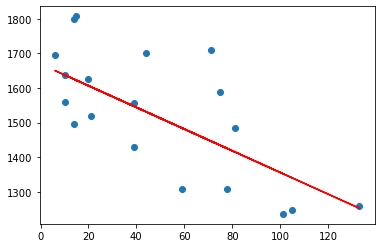

In [14]:
# График остатков
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [15]:
# Коэффициент детерминации около 50%. Следовательно данная модель для анализа не подойдет . Нет четкой зависимости

Задание 2.
Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности? 
Разделить данные на 2 группы
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [16]:
# Разделим данные на южные и северные города
df_north = df[df.location == 'North']
df_south = df[df.location == 'South']

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

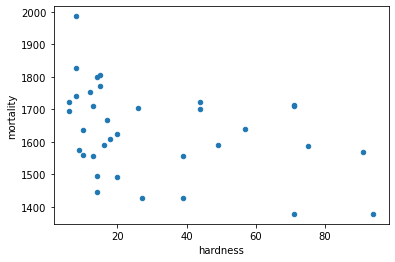

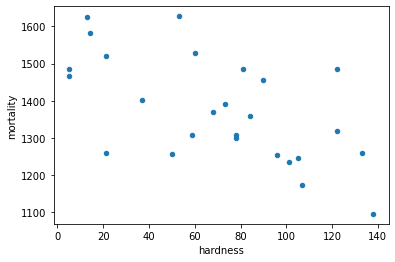

In [17]:
# Построим точечную взаимосвязь между жесткостью воды и средней годовой смертностью для северных и южных городов
df_north.plot(kind='scatter', x='hardness', y='mortality')
df_south.plot(kind='scatter', x='hardness', y='mortality')

In [18]:
# Вычислим корреляцию Пирсона для северных и южных городов

In [19]:
df_north[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [20]:
df_south[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [21]:
# Вычислим корреляцию Спирмена для северных и южных городов

In [22]:
df_north[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [23]:
df_south[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [24]:
# Как и в первом задании для северных и южных городов по отдельности обратная корреляция сохранилась.

In [25]:
# Построим модель линейной регрессии


In [26]:
# Для северных городов
X_n = df_north[['hardness']]
y_n = df_north['mortality']
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_n, y_n, test_size=0.30, random_state=42)
model_north = LinearRegression()
model_north.fit(X_train_n, y_train_n)
y_pred_n = model_north.predict(X_test_n)
model_north.score(X_test_n, y_test_n)

0.018885304285745863

In [27]:
# Для южных городов
X_s = df_south[['hardness']]
y_s = df_south['mortality']
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y_s, test_size=0.30, random_state=42)
model_south = LinearRegression()
model_south.fit(X_train_s, y_train_s)
y_pred_s = model_south.predict(X_test_s)
model_south.score(X_test_s, y_test_s)

-2.5519223012352077

In [28]:
# Отрицательный коэффициент детерминации не позволяет использовать данную модель для построения предсказания

In [29]:
 # Построим график остатков

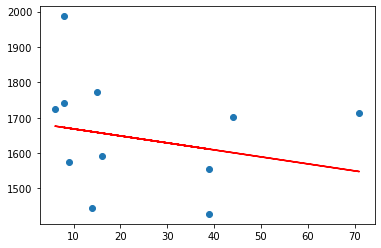

In [30]:
# Для северных городов
plt.scatter(X_test_n, y_test_n)
plt.plot(X_test_n, y_pred_n, c='r')

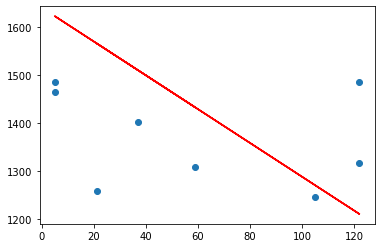

In [31]:
# Для южных городов
plt.scatter(X_test_s, y_test_s)
plt.plot(X_test_s, y_pred_s, c='r')

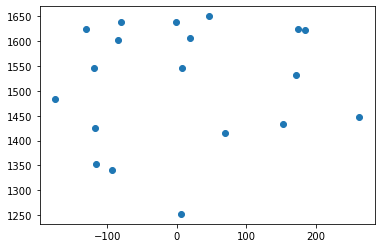

In [32]:
# График остатков
plt.scatter(y_test - y_pred, y_pred)